In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Fucntions of this notebook:
* Read signal data ("ticker_signal.csv" in directory ".../Output", generated by 4_model_fitting)
* Backtest trading strategy based on signal prediction 
* Plot wealth process 
* Output wealth process as one .csv file (with name "ticker_wealth.csv" and stored in directory ".../Output")

### Directory Setting

In [2]:
dir_working = "/Users/user/Desktop/E4733 AT/Project/Coding Environment/Codes"
os.chdir(dir_working)
dir_data = "../Output"
dir_output = "../Output"
ticker = "aapl"
ticker_list = ['aapl', 'amzn', 'nvda', 'amd', 'msft', 'fb', 'nflx', \
               'goog', 'intc', 'pypl']

### 1. Backtest Function 

In [3]:
def backtest(ticker, cost = 0, threshold = 0.5, initial_wealth = 1000):
    data = pd.read_csv(dir_data + '/' + ticker + "_signal.csv")
    data.time = pd.to_datetime(data.time)
    data = data.set_index('time', drop = True)
    wealth = initial_wealth
    W = []
    price = data['average_price'].values
    signal = data['signal_logistic'].values
    strength = data['logistic_prob'].values
    sig = signal * (strength>threshold)
    position = 0 * price # to store nominal position
    for i in range(len(position)):
        # stop when wealth drop to 0
        if wealth<=0:
            W.append(wealth)
            continue
        # initialization
        if i==0:
            position[i] = sig[i] * wealth
            W.append(wealth)
            continue
        # open new position from 0 position
        if sig[i] != 0 and position[i-1] == 0:
            wealth = wealth/(1+cost)
            position[i] = sig[i] * wealth
        # close position to 0
        elif sig[i] == 0 and position[i-1] != 0:
            wealth = wealth * (1-cost)
            position[i] = 0
        # signal changes sign but stay nonzero
        elif sig[i] * position[i-1] < 0:
            wealth = wealth * (1-cost)/(1+cost)
            position[i] = sig[i] * wealth
        # signal nonzero and unchanged 
        else: 
            position[i] = position[i-1]
        wealth += position[i-1]/price[i-1] * (price[i] - price[i-1])
        W.append(wealth)
    # write output file
    data['signal'] = sig
    data['wealth'] = W
    data.to_csv(dir_output + '/' + ticker + '_wealth.csv')
    return W, price

### 2. Execution

In [4]:
initial_wealth = 1000
cost = 0.0003
threshold = 0.5

#### Individual Stock

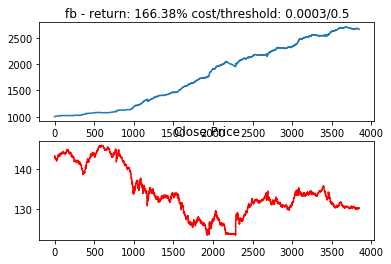

In [5]:
ticker = 'fb'
W, price = backtest(ticker, cost, threshold, initial_wealth)
plt.subplot(211)
plt.plot(W)
plt.title(ticker + " - return: " + \
          str(round(100 * (W[-1]/initial_wealth - 1), 2)) + \
          "% cost/threshold: " + str(cost) + "/" + str(threshold))
plt.subplot(212)
plt.plot(price, c='r')
plt.title("Close Price")
plt.show()

#### All Stocks

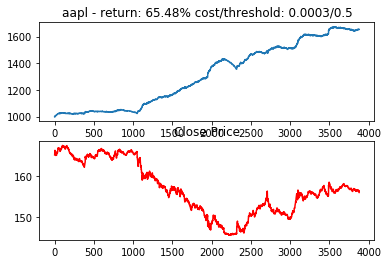

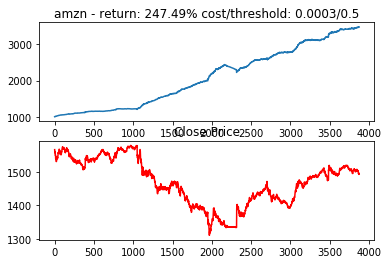

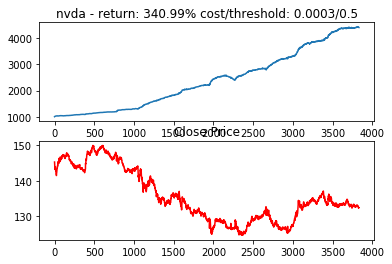

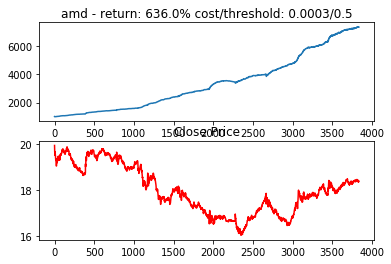

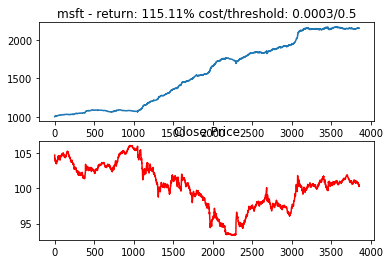

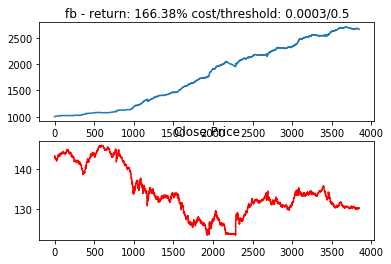

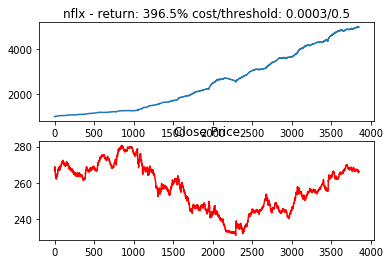

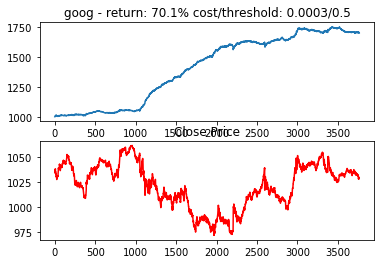

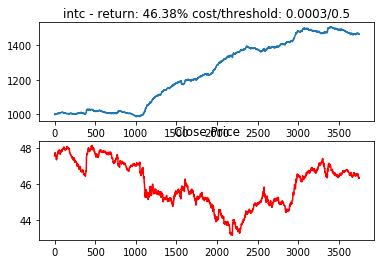

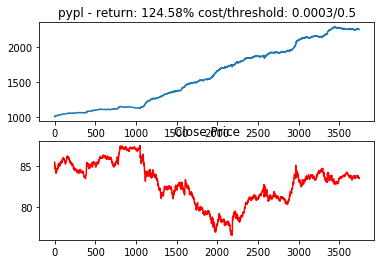

In [6]:
W_list = []
for i in range(len(ticker_list)):
    ticker = ticker_list[i]
    W, price = backtest(ticker, cost, threshold, initial_wealth)
    W_list.append(W)
    # plot
    plt.subplot(211)
    plt.plot(W)
    plt.title(ticker + " - return: " + \
              str(round(100 * (W[-1]/initial_wealth - 1), 2)) + \
              "% cost/threshold: " + str(cost) + "/" + str(threshold))
    plt.subplot(212)
    plt.plot(price, c='r')
    plt.title("Close Price")
    plt.show()